In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
cities_df=pd.DataFrame()
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1000)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities_df = cities_df.append(pd.DataFrame.from_dict({"City":cities}))
cities_df.head()

,City
0,sinkat
1,kodiak
2,yulara
3,narwar
4,upernavik


In [3]:
 # OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
params = { "appid" :api_key,"units":"metric" }

def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]
for index,row in cities_df.iterrows():
    params["q"] =f'{row["City"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    cities_df.at[index, 'Latitude'] = city_weather_resp.get("coord",{}).get("lat")
    cities_df.at[index, 'Longitude'] = city_weather_resp.get("coord",{}).get("lon")
    cities_df.at[index, 'Temperature'] = city_weather_resp.get('main',{}).get('temp_max')
    cities_df.at[index, 'Wind speed'] = city_weather_resp.get("wind",{}).get("speed")
    cities_df.at[index, 'Humidity'] = city_weather_resp.get("main",{}).get("humidity")
    cities_df.at[index, 'Cloudiness'] = city_weather_resp.get("clouds",{}).get("all")
   
    

Retrieving weather information for sinkat
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=sinkat
Retrieving weather information for kodiak
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kodiak
Retrieving weather information for yulara
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=yulara
Retrieving weather information for narwar
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=narwar
Retrieving weather information for upernavik
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=upernavik
Retrieving weather information for yellowknife
http://api.openweathermap.org/data/2.5/wea

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=barrow
Retrieving weather information for new norfolk
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=new+norfolk
Retrieving weather information for madimba
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=madimba
Retrieving weather information for hilo
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=hilo
Retrieving weather information for beloha
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=beloha
Retrieving weather information for coquimbo
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=b

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=gat
Retrieving weather information for mantoudion
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=mantoudion
Retrieving weather information for praya
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=praya
Retrieving weather information for avarua
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=avarua
Retrieving weather information for atuona
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=atuona
Retrieving weather information for shivrajpur
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=las+vegas
Retrieving weather information for bambous virieux
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=bambous+virieux
Retrieving weather information for vao
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=vao
Retrieving weather information for eskasem
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=eskasem
Retrieving weather information for saleaula
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=saleaula
Retrieving weather information for iralaya
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b699962

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=diapaga
Retrieving weather information for victoria
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=victoria
Retrieving weather information for vitim
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=vitim
Retrieving weather information for sao felix do xingu
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=sao+felix+do+xingu
Retrieving weather information for khatanga
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=khatanga
Retrieving weather information for rio grande
http://api.openweathermap.org/data/2.5/weather?units=<YourKe

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=el+dorado
Retrieving weather information for tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=tasiilaq
Retrieving weather information for hobart
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=hobart
Retrieving weather information for rancho palos verdes
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=rancho+palos+verdes
Retrieving weather information for kencong
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kencong
Retrieving weather information for beauly
http://api.openweathermap.org/data/2.5/weather?units=<YourKe

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=luderitz
Retrieving weather information for lagos
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=lagos
Retrieving weather information for fukue
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=fukue
Retrieving weather information for ilulissat
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=ilulissat
Retrieving weather information for terney
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=terney
Retrieving weather information for khabary
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c53

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=bandarbeyla
Retrieving weather information for bajo baudo
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=bajo+baudo
Retrieving weather information for kampot
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kampot
Retrieving weather information for senno
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=senno
Retrieving weather information for soligalich
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=soligalich
Retrieving weather information for nouadhibou
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b69996

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=louisbourg
Retrieving weather information for leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=leshukonskoye
Retrieving weather information for visby
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=visby
Retrieving weather information for caraquet
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=caraquet
Retrieving weather information for guerrero
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=guerrero
Retrieving weather information for oriximina
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=itarema
Retrieving weather information for mayo
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=mayo
Retrieving weather information for the valley
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=the+valley
Retrieving weather information for kungurtug
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kungurtug
Retrieving weather information for kayerkan
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kayerkan
Retrieving weather information for wawa
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appi

http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=kidal
Retrieving weather information for mackay
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=mackay
Retrieving weather information for richards bay
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=richards+bay
Retrieving weather information for contamana
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=contamana
Retrieving weather information for abu ghosh
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b6999628ebe&appid=bb3c5374aee842eece956b6999628ebe&units=metric&q=abu+ghosh
Retrieving weather information for ormara
http://api.openweathermap.org/data/2.5/weather?units=<YourKey>e956b69996

In [13]:
cities_df.head()
cities_df.to_csv('cities_df', sep='\t', encoding='utf-8')

In [5]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

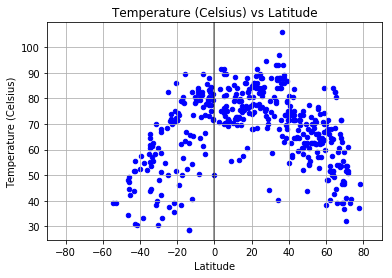

In [6]:
cities_df.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

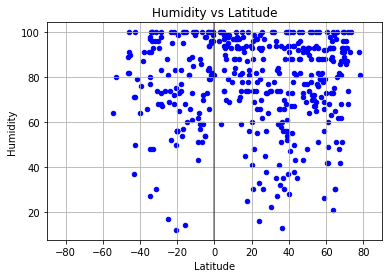

In [11]:
cities_df.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude.png")
plt.show()

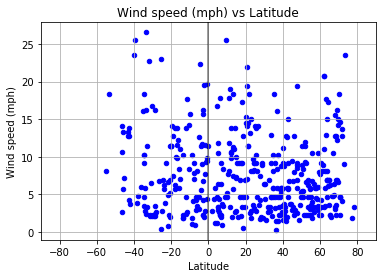

In [8]:
cities_df["Wind speed"] = pd.to_numeric(cities_df["Wind speed"])
cities_df.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

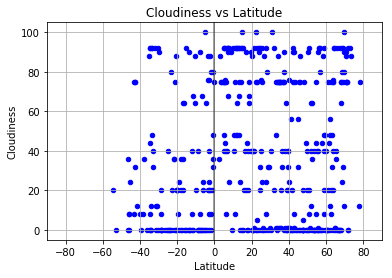

In [9]:
cities_df["Cloudiness"] = pd.to_numeric(cities_df["Cloudiness"])
cities_df.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()

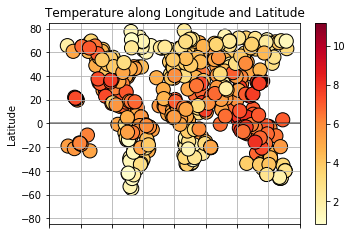

In [10]:
size_temp = np.round((((cities_df.Temperature)/100)**2)*10,2)
cities_df.plot(kind="scatter",x="Longitude",y="Latitude",grid=True, edgecolor="black",
                     c=size_temp,s=200,cmap=plt.cm.YlOrRd)
plt.xlabel("Longitude")
plt.tight_layout()
plt.title("Temperature along Longitude and Latitude")
plt.ylabel("Latitude")
plt.ylim([-85,85])
plt.grid(True)

plt.xlim([-200,200])
plt.subplots_adjust(bottom=.25, left=.25)

plt.axhline(0, color='black',alpha=0.5)
plt.savefig("Temperature approaching Equator")

plt.show()